 # Import Libraries





In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

import os

import warnings
warnings.filterwarnings('ignore')

# Explore Data

In [26]:
with_mask = os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')

In [27]:
without_mask = os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')

In [28]:
 len(with_mask)

3725

In [29]:
 len(without_mask)

3828

In [30]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [31]:
with_mask_labels[0:5]

[1, 1, 1, 1, 1]

In [32]:
without_mask_labels[0:5]

[0, 0, 0, 0, 0]

In [33]:
labels = with_mask_labels + without_mask_labels

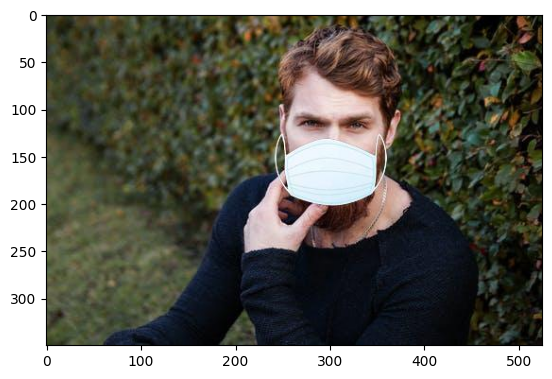

In [34]:
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

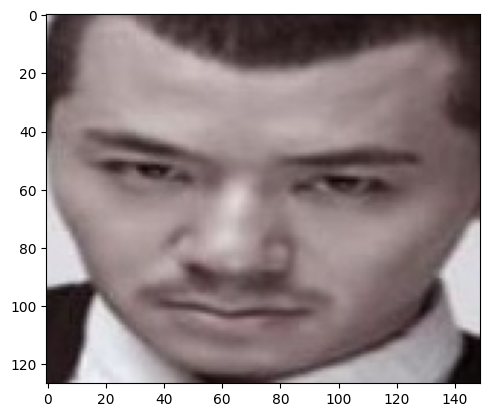

In [35]:
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_100.jpg')
imgplot = plt.imshow(img)
plt.show()

# Image Processing

### Resize the Images and Convert the images to numpy arrays

In [13]:
with_mask_path ="/kaggle/input/face-mask-dataset/data/with_mask/"

data = []

for img_file in with_mask:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/kaggle/input/face-mask-dataset/data/without_mask/'


for img_file in without_mask:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [14]:
type(data)

list

In [15]:
x = np.array(data)
y = np.array(labels)

In [16]:
type(x)

numpy.ndarray

# Modeling

### Train Test Split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [18]:
# scaling the data

x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [19]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [21]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=20)

Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 153s 883ms/step - acc: 0.7080 - loss: 0.6827 - val_acc: 0.8843 - val_loss: 0.2852
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 198s 862ms/step - acc: 0.8655 - loss: 0.3284 - val_acc: 0.9140 - val_loss: 0.2317
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 146s 857ms/step - acc: 0.9021 - loss: 0.2481 - val_acc: 0.9058 - val_loss: 0.2179
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 143s 844ms/step - acc: 0.9178 - loss: 0.2139 - val_acc: 0.9223 - val_loss: 0.2095
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 140s 825ms/step - acc: 0.9361 - loss: 0.1648 - val_acc: 0.9140 - val_loss: 0.2110
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 826ms/step - acc: 0.9475 - loss: 0.1470 - val_acc: 0.9273 - val_loss: 0.2369
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 835ms/step - acc: 0.9567 - loss: 0.1113 - val_acc: 0.9025 - val_loss: 0.2759
Epoch 8/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 136s 801ms/step - acc: 0.9574 - loss: 0.1085 - val_acc: 0.9223 - val_loss: 0.2842
Epoch 9/20
170/170 ━━━━━

In [22]:
model.evaluate(x_test_scaled, y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 288ms/step - acc: 0.9412 - loss: 0.3199


[0.378031849861145, 0.9377895593643188]

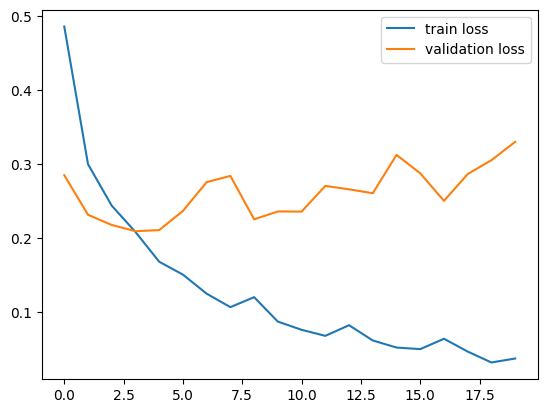

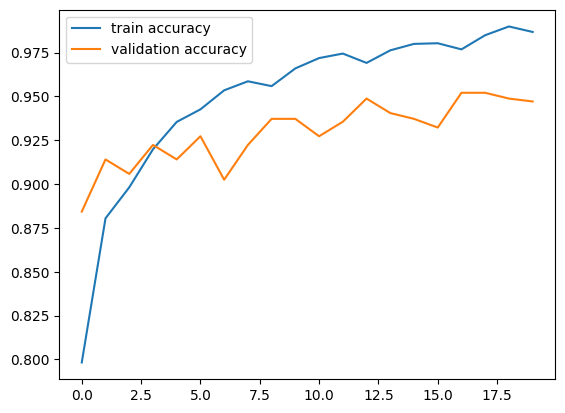

In [23]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

#### Predictive System

Path of the image to be predicted: /kaggle/input/face-mask-dataset/data/with_mask/with_mask_10.jpg


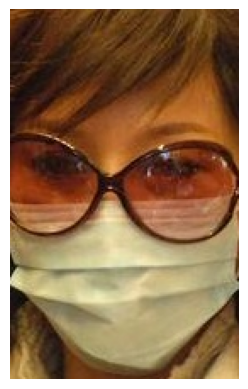

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
The person in the image is wearing a mask


In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

# Convert BGR image to RGB (matplotlib expects RGB)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

plt.imshow(input_image_rgb)
plt.axis('off')  # Hide axis labels
plt.show()

input_image_resized = cv2.resize(input_image_rgb, (128,128))
input_image_scaled = input_image_resized / 255.0

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

# Assuming 'model' is your TensorFlow/Keras model for prediction
input_prediction = model.predict(input_image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')
